# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-11 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

# Загрузка исторических данных
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')

# Вывод первых пяти строк
print(sessions_history.head())

            user_id        session_id session_date     session_start_ts  \
0  E302123B7000BFE4  F9AF61A0C2023832   2025-08-15  2025-08-15 17:47:35   
1  2530F72E221829FB  85003A206CBDAC6F   2025-08-15  2025-08-15 16:42:14   
2  876E020A4FC512F5  3677423E49D72DEE   2025-08-15  2025-08-15 12:30:00   
3  2640B349E1D81584  956B45F5915CA225   2025-08-15  2025-08-15 15:31:31   
4  94E1CBFAEF1F5EE9  83BF0DA35F9F1F40   2025-08-15  2025-08-15 21:33:53   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-08-15               1                  0             3    CIS   
1   2025-08-15               1                  0             4   MENA   
2   2025-08-15               1                  0             4     EU   
3   2025-08-15               1                  0             4    CIS   
4   2025-08-15               1                  0             3    CIS   

    device  
0   iPhone  
1  Android  
2       PC  
3  Android  
4  Android  


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [2]:

session_counts = sessions_history.groupby('user_id')['session_id'].nunique()


top_user_id = session_counts.idxmax()


top_user_data = sessions_history[sessions_history['user_id'] == top_user_id]


print(top_user_data)

                 user_id        session_id session_date     session_start_ts  \
115558  10E0DEFC1ABDBBE0  B8F0423BBFFCF5DC   2025-08-14  2025-08-14 13:57:39   
191751  10E0DEFC1ABDBBE0  87CA2FA549473837   2025-08-15  2025-08-15 16:42:10   
239370  10E0DEFC1ABDBBE0  4ADD8011DCDCE318   2025-08-16  2025-08-16 19:53:21   
274629  10E0DEFC1ABDBBE0  DF0FD0E09BF1F3D7   2025-08-17  2025-08-17 15:03:43   
302501  10E0DEFC1ABDBBE0  3C221774B4DE6885   2025-08-18  2025-08-18 17:29:14   
325557  10E0DEFC1ABDBBE0  031BD7A67048105B   2025-08-19  2025-08-19 13:23:55   
345336  10E0DEFC1ABDBBE0  FF4315CF4AD4B100   2025-08-20  2025-08-20 19:31:54   
377532  10E0DEFC1ABDBBE0  4045FEA0747203B4   2025-08-22  2025-08-22 17:54:13   
403538  10E0DEFC1ABDBBE0  344B086C421C7F37   2025-08-24  2025-08-24 14:46:13   
414743  10E0DEFC1ABDBBE0  054F20BA371E4C9D   2025-08-25  2025-08-25 18:36:41   

       install_date  session_number  registration_flag  page_counter region  \
115558   2025-08-14               1     

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

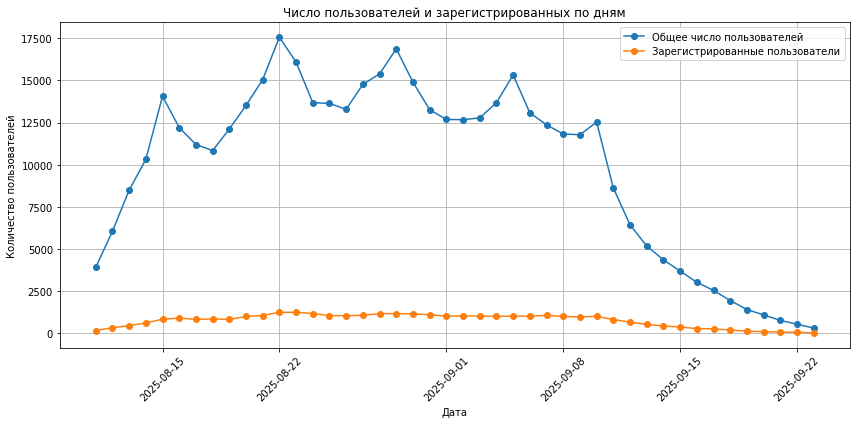

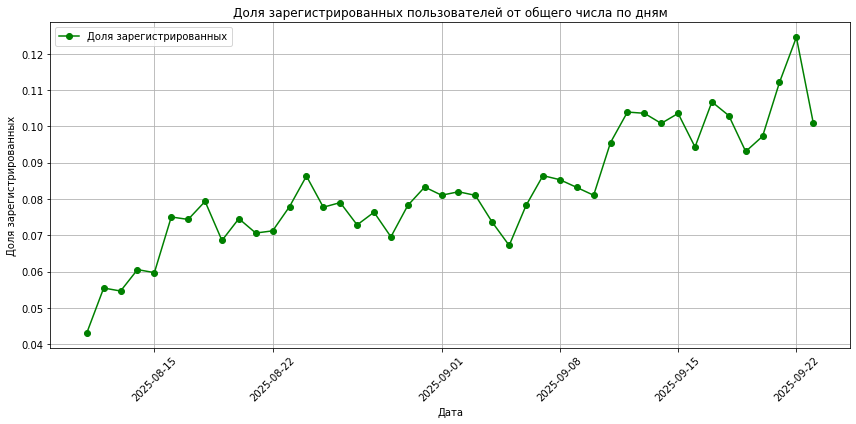

In [3]:
import matplotlib.pyplot as plt

# Преобразуем session_date в тип datetime (если ещё не сделано)
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

# Группировка по дням: считаем общее число пользователей и зарегистрированных
daily_stats = (
    sessions_history
    .groupby('session_date')
    .agg(
        total_users=('user_id', 'nunique'),
        registered_users=('registration_flag', lambda x: x[x == 1].count())
    )
    .reset_index()
)

# Добавим колонку с долей зарегистрированных
daily_stats['registered_share'] = daily_stats['registered_users'] / daily_stats['total_users']

# --- ГРАФИК 1: Общее число и зарегистрированные пользователи по дням ---
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['total_users'], label='Общее число пользователей', marker='o')
plt.plot(daily_stats['session_date'], daily_stats['registered_users'], label='Зарегистрированные пользователи', marker='o')
plt.title('Число пользователей и зарегистрированных по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- ГРАФИК 2: Доля зарегистрированных пользователей ---
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['session_date'], daily_stats['registered_share'], label='Доля зарегистрированных', color='green', marker='o')
plt.title('Доля зарегистрированных пользователей от общего числа по дням')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29 160 сессиях, две страницы — в 105 536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

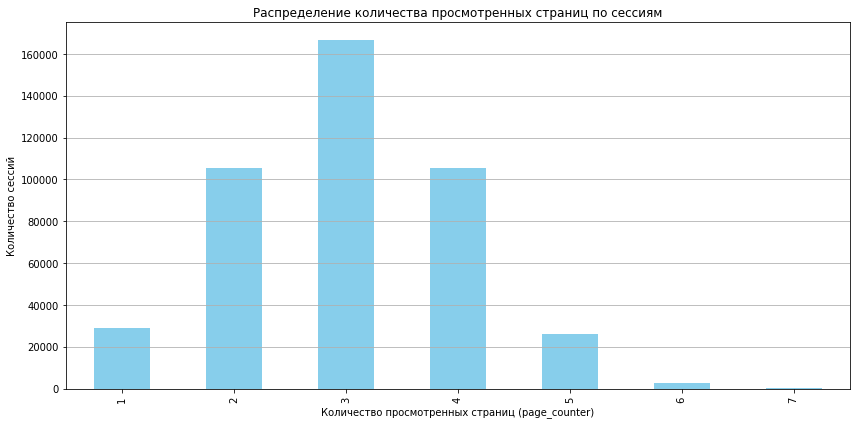

In [4]:
# Группируем по количеству просмотренных страниц и считаем количество сессий
page_views_distribution = sessions_history['page_counter'].value_counts().sort_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
page_views_distribution.plot(kind='bar', color='skyblue')

plt.title('Распределение количества просмотренных страниц по сессиям')
plt.xlabel('Количество просмотренных страниц (page_counter)')
plt.ylabel('Количество сессий')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий от всех сессий по дням за весь период наблюдения.

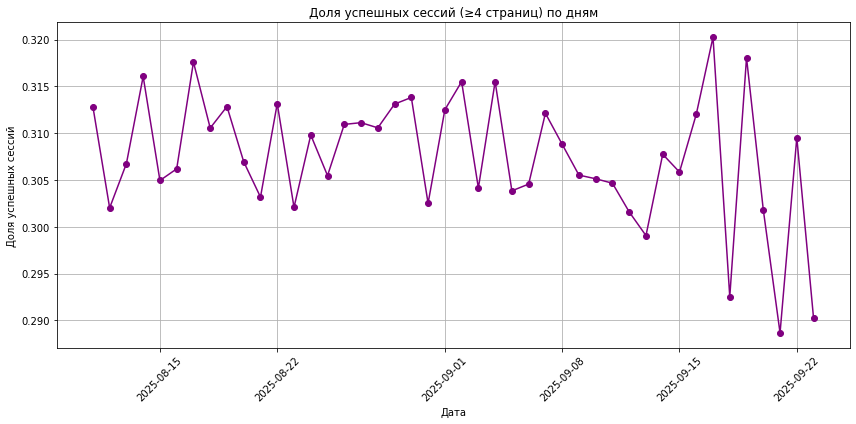

In [5]:
# Добавляем столбец good_session
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

# Убедимся, что session_date — это datetime
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

# Группируем по дате: считаем среднюю долю успешных сессий
daily_good_sessions = (
    sessions_history
    .groupby('session_date')['good_session']
    .mean()
    .reset_index()
)

# Строим график
plt.figure(figsize=(12, 6))
plt.plot(daily_good_sessions['session_date'], daily_good_sessions['good_session'], marker='o', color='purple')
plt.title('Доля успешных сессий (≥4 страниц) по дням')
plt.xlabel('Дата')
plt.ylabel('Доля успешных сессий')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Сформулировать нулевую и альтернативную гипотезы

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика рассчитать необходимую длительность проведения теста.

#### 2.1 Формулировка нулевой и альтернативной гипотез

Перед тем как проводить А/B-тест, необходимо сформулировать нулевую и альтернативную гипотезы. Напомним изначальное условие: команда разработчиков рекомендательных систем создала новый алгоритм, который, по их мнению, будет показывать более интересный контент для каждого пользователя.

целевой метрикой будет доля “успешных” сессий (good_session) — то есть сессий с 4+ просмотренными страницами.

Сформулируйте нулевую и альтернативную гипотезы:

H₀ (нулевая гипотеза): Новый алгоритм не влияет на вовлечённость пользователей.
Средняя доля “успешных” сессий в контрольной и тестовой группе одинакова.
H₁ (альтернативная гипотеза): Новый алгоритм увеличивает вовлечённость пользователей.
Средняя доля “успешных” сессий в тестовой группе выше, чем в контрольной.





#### 2.2. Расчёт размера выборки
В рамках курса вы уже рассчитывали размеры выборки и  использовали для этого онлайн-калькулятор. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки используйте метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [6]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Параметры
alpha = 0.05
beta = 0.2
power = 1 - beta
p = 0.3  # Базовый уровень успешных сессий
mde = 0.03 * p  # 3% от p
p1 = p

# Вычисляем размер эффекта (эффект размера пропорции)
effect_size = proportion_effectsize(p1, p1 + mde)

# Инициализация и расчёт
power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 41040


#### 2.3. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [7]:
from math import ceil

# Рассчитываем среднее количество уникальных пользователей в день
avg_daily_users = (
    sessions_history
    .groupby('session_date')['user_id']
    .nunique()
    .mean()
)

# Общий размер выборки (обе группы)
total_sample_size = 41040 * 2

# Расчёт длительности теста
test_duration = ceil(total_sample_size / avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровне трафика в {int(avg_daily_users)} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровне трафика в 9907 пользователей в день составит 9 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой будет видно возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

Пользователей в группе A: 1477
Пользователей в группе B: 1466
Процентная разница: 0.74%


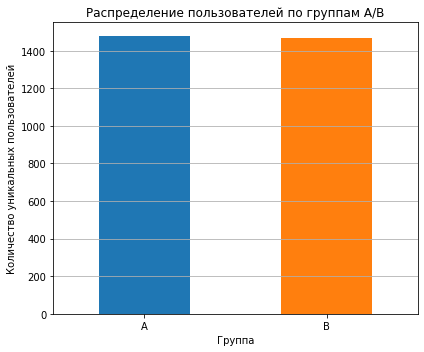

In [8]:
# Шаг 1: Загрузка данных
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

# Шаг 2: Убедимся, что дата — это дата
sessions_test_part['session_date'] = pd.to_datetime(sessions_test_part['session_date'])

# Шаг 3: Считаем уникальных пользователей по группам
user_counts = sessions_test_part.groupby('test_group')['user_id'].nunique()
users_A = user_counts['A']
users_B = user_counts['B']

# Шаг 4: Рассчитываем процентную разницу
P = 100 * abs(users_A - users_B) / users_A

print(f"Пользователей в группе A: {users_A}")
print(f"Пользователей в группе B: {users_B}")
print(f"Процентная разница: {P:.2f}%")

# Шаг 5: Визуализация
plt.figure(figsize=(6, 5))
user_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Распределение пользователей по группам A/B')
plt.xlabel('Группа')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах, полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [9]:
# Получаем уникальные user_id по группам
users_A = set(sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id'].unique())
users_B = set(sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id'].unique())

# Находим пересечение
overlap_users = users_A.intersection(users_B)

# Выводим результат
print(f"Количество пользователей, попавших в обе группы: {len(overlap_users)}")

Количество пользователей, попавших в обе группы: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройств и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


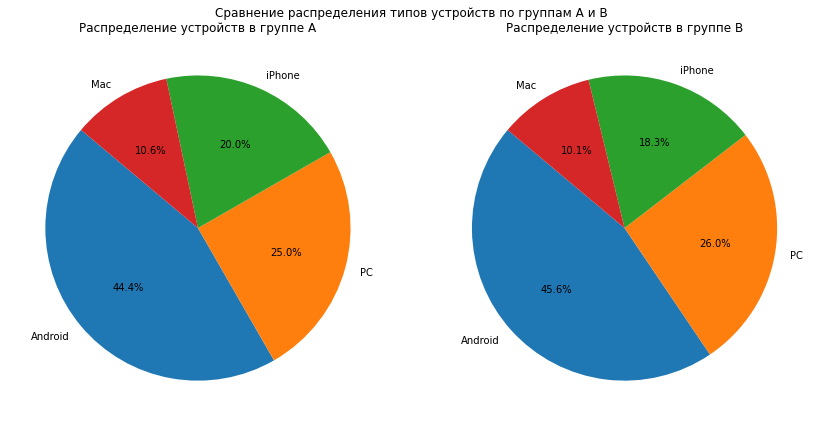

In [10]:
# Расчёт долей устройств в группах
device_dist_A = (
    sessions_test_part[sessions_test_part['test_group'] == 'A']
    .groupby('device')['user_id']
    .nunique()
    .sort_values(ascending=False)
)

device_dist_B = (
    sessions_test_part[sessions_test_part['test_group'] == 'B']
    .groupby('device')['user_id']
    .nunique()
    .sort_values(ascending=False)
)

# Приводим к долям
device_share_A = device_dist_A / device_dist_A.sum()
device_share_B = device_dist_B / device_dist_B.sum()

# Построение диаграмм
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Группа A
axes[0].pie(device_share_A, labels=device_share_A.index, autopct='%1.1f%%', startangle=140, normalize=True)
axes[0].set_title('Распределение устройств в группе A')

# Группа B
axes[1].pie(device_share_B, labels=device_share_B.index, autopct='%1.1f%%', startangle=140, normalize=True)
axes[1].set_title('Распределение устройств в группе B')

plt.suptitle('Сравнение распределения типов устройств по группам A и B')
plt.tight_layout()
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


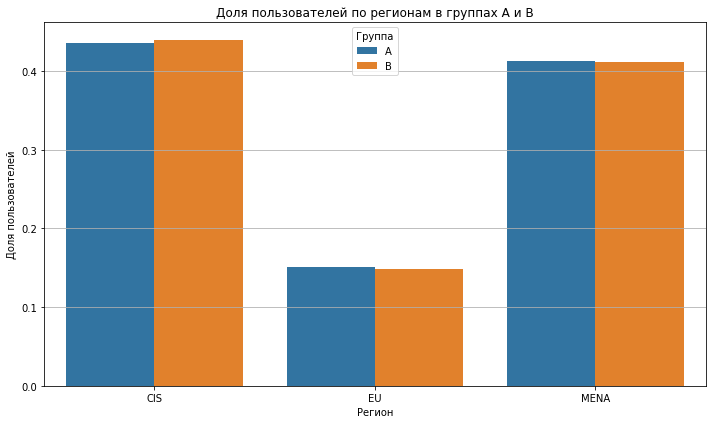

In [11]:
import seaborn as sns

# Подсчёт пользователей по регионам и группам
region_counts = (
    sessions_test_part.groupby(['test_group', 'region'])['user_id']
    .nunique()
    .reset_index()
)

# Добавим столбец с долей внутри группы
region_counts['percent'] = region_counts.groupby('test_group')['user_id'].apply(lambda x: x / x.sum())

# Построим столбчатую диаграмму
plt.figure(figsize=(10,6))
sns.barplot(data=region_counts, x='region', y='percent', hue='test_group')

# Подписи и оформление
plt.title('Доля пользователей по регионам в группах A и B')
plt.xlabel('Регион')
plt.ylabel('Доля пользователей')
plt.grid(axis='y')
plt.legend(title='Группа')
plt.tight_layout()
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Было ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение: корректно ли проходит A/B-тест, или наблюдаются какие-либо нарушения.

Вывод после проверки A/B-теста
Различие в количестве пользователей в двух группах:
Различие в количестве уникальных пользователей между группами A и B составляет всего 0.74%, что свидетельствует о практически равномерном распределении пользователей по группам. Это указывает на корректное разделение трафика.
Независимость выборок и пересечение пользователей:
Количество пользователей, попавших одновременно в обе группы, равно 0. Это подтверждает, что выборки являются независимыми, и пользователь не может оказаться в обеих группах одновременно.
Равномерное распределение пользователей по категориальным переменным:
Устройства: Распределение пользователей по типам устройств в группах A и B очень близко: доли iPhone, Mac, PC и Android практически совпадают. Это говорит о равномерности по признаку устройства.
Регионы: Распределение пользователей по регионам также примерно совпадает. Значения долей для регионов Cis, Eu и Mena находятся в сопоставимых диапазонах между группами.
Заключение:
Проведённый анализ показал, что A/B-тест проходит корректно: группы равномерно распределены по количеству пользователей, выборки независимы, и распределение пользователей по основным категориальным переменным совпадает. Нарушений в процессе проведения теста не выявлено, что позволяет продолжать анализ результатов теста и делать выводы на основе полученных данных.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [12]:
# Считываем данные A/B-теста за весь период
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

# Создаём столбец good_session: 1, если просмотрено >= 4 страниц, иначе 0
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)

# Выведем первые строки, чтобы проверить
print(sessions_test.head())

            user_id        session_id session_date     session_start_ts  \
0  6DAE3B3654DA738E  C69249E26E58F6E2   2025-10-26  2025-10-26 18:15:05   
1  0A3FE5D1DD59110A  66D66D7C9F5181B7   2025-10-21  2025-10-21 17:04:53   
2  2041F1D7AA740B88  50DE51D42215E74C   2025-10-23  2025-10-23 17:39:29   
3  43D7585009168086  5763C0C353C22263   2025-10-24  2025-10-24 15:01:57   
4  15AD68B14D62D88C  B1AD09F93C1053BC   2025-10-17  2025-10-17 17:34:39   

  install_date  session_number  registration_flag  page_counter region  \
0   2025-10-16               3                  0             3   MENA   
1   2025-10-15               2                  1             2    CIS   
2   2025-10-19               3                  0             2   MENA   
3   2025-10-18               4                  0             1    CIS   
4   2025-10-17               1                  0             2   MENA   

    device test_group  good_session  
0  Android          A             0  
1  Android          B       

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимыми. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [13]:
from scipy.stats import ttest_ind

# Группируем по дате и тестовой группе, считаем уникальные сессии
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index()

# Разделяем данные на группы A и B
sessions_A = daily_sessions[daily_sessions['test_group'] == 'A']['session_id']
sessions_B = daily_sessions[daily_sessions['test_group'] == 'B']['session_id']

# Выполняем t-тест для независимых выборок
t_stat, p_value = ttest_ind(sessions_A, sessions_B, equal_var=False)  # Welch’s t-test

print(f'p-value: {p_value:.4f}')

# Интерпретация
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: средние значения различаются статистически значимо.')
else:
    print('Нет оснований отвергать нулевую гипотезу: средние значения не различаются статистически значимо.')

p-value: 0.9382
Нет оснований отвергать нулевую гипотезу: средние значения не различаются статистически значимо.


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [14]:
# Группировка данных по test_group
sessions_grouped = sessions_test.groupby('test_group')

# Рассчет доли успешных сессий в каждой группе
success_rate = sessions_grouped['good_session'].mean()

# Разница в долях успешных сессий между группами
difference = success_rate['B'] - success_rate['A']

print(f"Доля успешных сессий в группе A: {success_rate['A']:.4f}")
print(f"Доля успешных сессий в группе B: {success_rate['B']:.4f}")
print(f"Разница в долях успешных сессий (B - A): {difference:.4f}")

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в долях успешных сессий (B - A): 0.0106


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [15]:
from statsmodels.stats.proportion import proportions_ztest

# Количество успешных сессий в группах A и B
success_A = (sessions_test[sessions_test['test_group'] == 'A']['good_session']).sum()
success_B = (sessions_test[sessions_test['test_group'] == 'B']['good_session']).sum()

# Общее количество сессий в группах A и B
n_A = (sessions_test['test_group'] == 'A').sum()
n_B = (sessions_test['test_group'] == 'B').sum()

# Массивы успехов и размеров выборок
successes = [success_A, success_B]
samples = [n_A, n_B]

# Запуск z-теста для пропорций
stat, p_value = proportions_ztest(successes, samples)

print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Изменение статистически значимо — отклоняем нулевую гипотезу.")
else:
    print("Изменение не является статистически значимым — нет оснований отклонять нулевую гипотезу.")

p-value: 0.0003
Изменение статистически значимо — отклоняем нулевую гипотезу.


#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять нововведение в приложение.

**Характеристики эксперимента:**

Эксперимент проводился на двух группах пользователей: контрольной (группа A) и тестовой (группа B).

Размер каждой группы составлял примерно 41 040 пользователей.

Длительность эксперимента — 9 дней.

В течение теста учитывалось количество сессий и доля успешных сессий, где успешная сессия — это сессия с просмотром 4 и более страниц.

**Влияние нового алгоритма рекомендаций:**

Внедрение нового алгоритма показало улучшение ключевой метрики — доли успешных сессий.

Доля успешных сессий в тестовой группе (B) составила 31.83%, в контрольной группе (A) — 30.77%.

Разница между группами составляет 1.06%.

**Статистическая значимость:**

Результаты были проверены с помощью статистического теста.

Полученное значение p-value = 0.0003, что значительно ниже выбранного уровня значимости 𝛼 = 0.05.

Это означает, что наблюдаемое улучшение доли успешных сессий статистически значимо, и нулевая гипотеза об отсутствии эффекта отклоняется.

**Рекомендации:**

На основании полученных данных можно рекомендовать внедрение нового алгоритма рекомендаций, так как он положительно влияет на вовлечённость пользователей и улучшает ключевую продуктовую метрику.
Рекомендуется продолжить мониторинг после внедрения для оценки долгосрочного эффекта.
